# Magic Gamma Telescope

In [1]:
import sys
sys.path.append('/Users/IzmailovPavel/Documents/Education/Course Project/Code')
import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt

from GP.covariance_functions import SquaredExponential
from GP.gaussian_process_classification import GPC

from sklearn.cluster import KMeans

from vi_svi_class_experiments import run_methods
from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
%matplotlib inline
%load_ext autoreload
%autoreload 2


## Данные

In [3]:
x_tr, y_tr = load_svmlight_file('../../../../Programming/DataSets/Classification/a8a(22606,123).txt')
x_tr, y_tr = shuffle(x_tr, y_tr, random_state=241)
data_name = 'a8a'
file_name = data_name

x_tr = x_tr.toarray()
scaler = StandardScaler()
x_tr = scaler.fit_transform(x_tr).T

x_tr = (x_tr + 1) / 2
y_tr = y_tr.reshape((y_tr.size, 1))
x_test = x_tr[:, int(x_tr.shape[1] * 0.8):]
y_test = y_tr[int(x_tr.shape[1] * 0.8):, :]
y_tr = y_tr[:int(x_tr.shape[1] * 0.8), :]
x_tr = x_tr[:, : int(x_tr.shape[1] * 0.8)]
dim, num = x_tr.shape
print(num, dim)
print(data_name)

18156 123
a8a


## K-Means cluster centers

In [4]:
ind_num = 300
print('Finding means...')
means = KMeans(n_clusters=ind_num, n_init=3, max_iter=100, random_state=241)
means.fit(x_tr.T)
inputs = means.cluster_centers_.T
print('...found')

Finding means...
...found


In [5]:
with open('../plots/vi_vs_svi_class/'+ data_name +'_title.txt', 'w') as f:
    title = data_name + ' dataset, ' + 'n = ' + str(num) + ', d = ' + str(dim) + ', m = ' + str(ind_num)
    f.write(title)

In [6]:
cov_params = np.array([30., 20. , .01])

## svi-L-BFGS-B-c method

In [5]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
svi_gp = GPC(model_covariance_obj, method='svi')

In [19]:
opts = {'mode': 'full', 'maxiter': 100, 'mydisp': True}
svi_res = svi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts)

Hyper-parameters at iteration 0 : [  4.49115541e+01   7.07856867e+01   1.00000000e-02   0.00000000e+00
   0.00000000e+00]
Hyper-parameters at iteration 1 : [  4.50111035e+01   7.07783097e+01   1.14229528e-01  -8.10350600e-05
  -5.29285254e-03]
Hyper-parameters at iteration 2 : [  4.50224171e+01   7.07774775e+01   1.26478169e-01  -9.39631334e-05
  -5.90267059e-03]
Hyper-parameters at iteration 3 : [  4.50616791e+01   7.07746071e+01   1.69936126e-01  -1.56159649e-04
  -8.05472677e-03]
Hyper-parameters at iteration 4 : [  4.50950422e+01   7.07721987e+01   2.08610739e-01  -2.43638481e-04
  -9.95165369e-03]
Hyper-parameters at iteration 5 : [  4.51362301e+01   7.07692947e+01   2.60400688e-01  -4.39250286e-04
  -1.24570246e-02]
Hyper-parameters at iteration 6 : [  4.51737152e+01   7.07668003e+01   3.16096983e-01  -8.18552132e-04
  -1.50946771e-02]
Hyper-parameters at iteration 7 : [  4.52005226e+01   7.07653607e+01   3.75043491e-01  -1.57580189e-03
  -1.78080069e-02]
Hyper-parameters at iter

In [20]:
metric = lambda w: svi_gp.get_prediction_quality(w, x_test, y_test)
svi_x_lst, svi_y_lst = svi_res.plot_performance(metric, 't', freq=1)

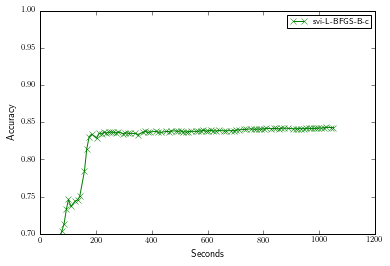

In [21]:
plt.plot(svi_x_lst[1:], svi_y_lst[1:], '-gx', label='svi-L-BFGS-B-c')
plt.ylim([0.7, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

## vi-means-c method
Подбор числа пересчетов

In [10]:
maxfuns = [5, 10, 15, 20]
results = []
for maxfun in maxfuns:
    print(maxfun)
    model_covariance_obj = SquaredExponential(np.copy(cov_params))
    vi_gp = GPC(model_covariance_obj, method='vi')
    opts = {'maxfun':maxfun, 'mydisp': False, 'num_updates':3}
    results.append(vi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts, max_out_iter=10))
    print()

5

10

15

20



0
1
2
3


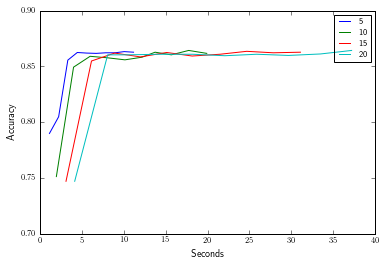

In [12]:
metric = lambda w: vi_gp.get_prediction_quality(w, x_test, y_test)
for i in range(len(maxfuns)):
    vi_x_lst, vi_y_lst = results[i].plot_performance(metric, 't', freq=1)
    plt.plot(vi_x_lst[1:], vi_y_lst[1:], label=maxfuns[i])
    print(i)
plt.ylim([.7, .9])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

Обучение лучшего варианта

In [7]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
vi_gp = GPC(model_covariance_obj, method='vi')
opts = {'maxfun':5, 'mydisp': True, 'num_updates':3}
vi_res = vi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts, max_out_iter=20)

Hyper-parameters at iteration 0 : [  3.00000000e+01   2.00000000e+01   1.00000000e-02]
Hyper-parameters at iteration 1 : [  1.30200492e+01   2.06624155e+02   1.00000000e-02]
Hyper-parameters at iteration 2 : [  1.89029221e+01   2.07173909e+02   1.00000000e-02]
	Hyper-parameters at outter iteration 0 : [  5.15256170e+01   2.62455685e+02   1.00000000e-02]
Hyper-parameters at iteration 0 : [  5.15256170e+01   2.62455685e+02   1.00000000e-02]
Hyper-parameters at iteration 1 : [  51.5262685   262.45615206    0.31188375]
	Hyper-parameters at outter iteration 1 : [  5.15259492e+01   2.62455802e+02   1.56481493e-01]
Hyper-parameters at iteration 0 : [  5.15259492e+01   2.62455802e+02   1.56481493e-01]
Hyper-parameters at iteration 1 : [  5.17995799e+01   2.62824567e+02   1.25348823e-01]
Hyper-parameters at iteration 2 : [  5.19654208e+01   2.63048029e+02   1.12689855e-01]
	Hyper-parameters at outter iteration 2 : [  5.19886428e+01   2.63079847e+02   1.05300974e-01]
Hyper-parameters at iteratio

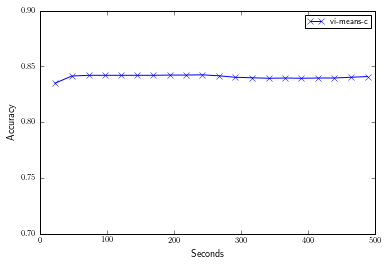

In [8]:
metric = lambda w: vi_gp.get_prediction_quality(w, x_test, y_test)
vi_x_lst, vi_y_lst = vi_res.plot_performance(metric, 't', freq=1)
plt.plot(vi_x_lst[1:], vi_y_lst[1:], '-bx', label='vi-means-c')
# plt.plot(svi_x_lst[1:100], svi_y_lst[1:100], '-gx', label='svi-L-BFGS-B-c')
plt.ylim([0.7, .9])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### Taylor
Подбор числа пересчетов

In [9]:
maxfuns = [5, 10, 15, 20]
results = []
for maxfun in maxfuns:
    print(maxfun)
    model_covariance_obj = SquaredExponential(np.copy(cov_params))
    vi_gp = GPC(model_covariance_obj, method='vi')
    opts = {'bound': 'Taylor', 'maxfun':maxfun, 'mydisp': False, 'num_updates':3}
    results.append(vi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts, max_out_iter=10))
    print()

5

10

15


KeyboardInterrupt: 

In [12]:
vi_gp = GPC(model_covariance_obj, method='vi')
metric = lambda w: vi_gp.get_prediction_quality(w, x_test, y_test)
for i in range(len(maxfuns)):
    temp_vi_x_lst, temp_vi_y_lst = results[i].plot_performance(metric, 't', freq=1)
    plt.plot(temp_vi_x_lst[1:], temp_vi_y_lst[1:], label=maxfuns[i])
    print(i)
plt.ylim([.7, .9])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

TypeError: 'NoneType' object is not subscriptable

Лучший вариант

In [15]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
vi_gp = GPC(model_covariance_obj, method='vi')
opts = {'bound': 'Taylor', 'maxfun':5, 'mydisp': True, 'num_updates':3}
vi_res = vi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts, max_out_iter=20)

Hyper-parameters at iteration 0 : [  3.00000000e+01   2.00000000e+01   1.00000000e-02]
Hyper-parameters at iteration 1 : [  1.30875106e+01   5.38913466e+02   1.00000000e-02]
Hyper-parameters at iteration 2 : [  6.27046637e+01   5.59863235e+02   1.00000000e-02]
Hyper-parameters at iteration 3 : [  7.83412021e+01   5.64772344e+02   1.02901156e-01]
	Hyper-parameters at outter iteration 0 : [  7.03818198e+01   5.59572885e+02   8.90437991e-02]
Hyper-parameters at iteration 0 : [  7.03818198e+01   5.59572885e+02   8.90437991e-02]
	Hyper-parameters at outter iteration 1 : [  7.03822029e+01   5.59572408e+02   8.90310296e-02]
Hyper-parameters at iteration 0 : [  7.03822029e+01   5.59572408e+02   8.90310296e-02]
Hyper-parameters at iteration 1 : [  7.05427371e+01   5.59831921e+02   8.32889253e-02]
	Hyper-parameters at outter iteration 2 : [  7.05426757e+01   5.59831821e+02   8.32630766e-02]
Hyper-parameters at iteration 0 : [  7.05426757e+01   5.59831821e+02   8.32630766e-02]
Hyper-parameters at

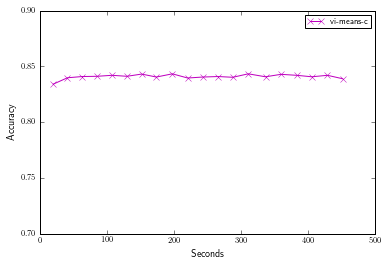

In [16]:
metric = lambda w: vi_gp.get_prediction_quality(w, x_test, y_test)
vi_t_x_lst, vi_t_y_lst = vi_res.plot_performance(metric, 't', freq=1)
plt.plot(vi_t_x_lst[1:], vi_t_y_lst[1:], '-mx', label='vi-means-c')
# plt.plot(svi_x_lst[1:100], svi_y_lst[1:100], '-gx', label='svi-L-BFGS-B-c')
plt.ylim([.7, .9])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### Stochastic Taylor

In [11]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
vi_gp = GPC(model_covariance_obj, method='vi')
opts = {'bound': 'Taylor', 'mode': 'adadelta', 'num_updates': 1, 'mydisp': True, 'print_freq': 1, 'step_rate': 1.,
        'maxiter': 1, 'batch_size':1000}
vi_res = vi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts, max_out_iter=20)

Iteration  0 :
	Gradient norm 39.5916792905
	Hyper-parameters at outter iteration 0 : [  2.94050034e+01   2.05873988e+01   2.45726542e-02]
Iteration  0 :
	Gradient norm 22.0069053916
	Hyper-parameters at outter iteration 1 : [  2.88052481e+01   2.11793447e+01   1.95267701e-02]
Iteration  0 :
	Gradient norm 14.9481917361
	Hyper-parameters at outter iteration 2 : [  2.80125615e+01   2.19575224e+01  -6.39837225e-03]
Iteration  0 :
	Gradient norm 10.9518289207
	Hyper-parameters at outter iteration 3 : [  2.73975598e+01   2.25648292e+01  -8.92276876e-03]
Iteration  0 :
	Gradient norm 33.4369199458
	Hyper-parameters at outter iteration 4 : [  2.67920522e+01   2.31638653e+01  -1.14470014e-02]
Iteration  0 :
	Gradient norm 25.6837086435
	Hyper-parameters at outter iteration 5 : [  2.60168505e+01   2.39293296e+01   1.91774282e-02]
Iteration  0 :
	Gradient norm 4.73488768259
	Hyper-parameters at outter iteration 6 : [  2.53970062e+01   2.45346978e+01  -6.16596378e-06]
Iteration  0 :
	Gradient no

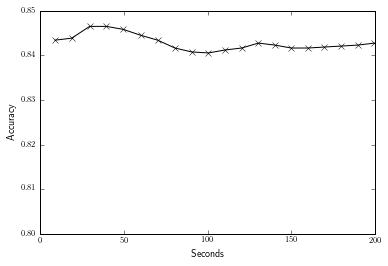

In [12]:
metric = lambda w: vi_gp.get_prediction_quality(w, x_test, y_test)
vi_st_x_lst, vi_st_y_lst = vi_res.plot_performance(metric, 't', freq=1)
plt.plot(vi_st_x_lst[1:], vi_st_y_lst[1:], '-kx', label='vi-means-c Stochastic')
plt.ylim([.8, .85])
# plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

## svi-AdaDelta-c
Подберем шаг для метода

In [22]:
results = []
steps = [1., 0.5, 0.3, 0.1, 0.01]
for step in steps:
    print(step)
    model_covariance_obj = SquaredExponential(np.copy(cov_params))
    ad_gp = GPC(model_covariance_obj, method='svi', hermgauss_deg=100)

    opts = {'mode': 'adadelta', 'maxiter': 10, 'verbose': False, 'batch_size': 50, 
            'step_rate': step}#, 'print_freq':50}
    batch_res = ad_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts)
    results.append(batch_res)

1.0
0.5
0.3
0.1
0.01


0
1
2
3
4


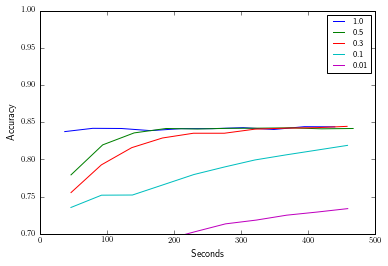

In [23]:
metric = lambda w: ad_gp.get_prediction_quality(w, x_test, y_test)
for i in range(len(results)):
    svi_ad_x_lst, svi_ad_y_lst = results[i].plot_performance(metric, 't', freq=1)
    plt.plot(svi_ad_x_lst[1:], svi_ad_y_lst[1:], label=steps[i])
    print(i)
plt.ylim([0.7, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

In [32]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
ad_gp = GPC(model_covariance_obj, method='svi', hermgauss_deg=100)
opts = {'mode': 'adadelta', 'maxiter': 20, 'verbose': True, 'batch_size': 200, 
        'step_rate': 1., 'print_freq':1}
batch_res = ad_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts)

Iteration  0 :
	Gradient norm 16.992891933
Iteration  1 :
	Gradient norm 16.8966220792
Iteration  2 :
	Gradient norm 11.4420433255
Iteration  3 :
	Gradient norm 17.2119046613
Iteration  4 :
	Gradient norm 12.5996472058
Iteration  5 :
	Gradient norm 4.79841075653
Iteration  6 :
	Gradient norm 7.00657438865
Iteration  7 :
	Gradient norm 5.60460486767
Iteration  8 :
	Gradient norm 8.59201540456
Iteration  9 :
	Gradient norm 8.067834139
Iteration  10 :
	Gradient norm 12.2792703253
Iteration  11 :
	Gradient norm 4.54774122217
Iteration  12 :
	Gradient norm 12.9948175367
Iteration  13 :
	Gradient norm 16.9134018255
Iteration  14 :
	Gradient norm 7.69947844073
Iteration  15 :
	Gradient norm 5.06893182522
Iteration  16 :
	Gradient norm 5.3151366975
Iteration  17 :
	Gradient norm 6.74741514301
Iteration  18 :
	Gradient norm 6.14948890077
Iteration  19 :
	Gradient norm 4.63347064548


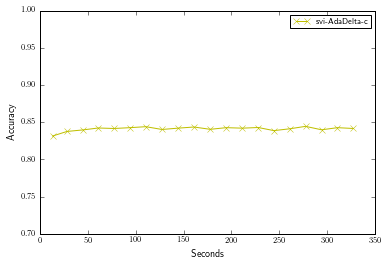

In [33]:
metric = lambda w: ad_gp.get_prediction_quality(w, x_test, y_test)
svi_ad_x_lst, svi_ad_y_lst = batch_res.plot_performance(metric, 't', freq=1)
plt.plot(svi_ad_x_lst[1:], svi_ad_y_lst[1:], '-yx', label='svi-AdaDelta-c')
plt.ylim([0.7, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

## Выводы

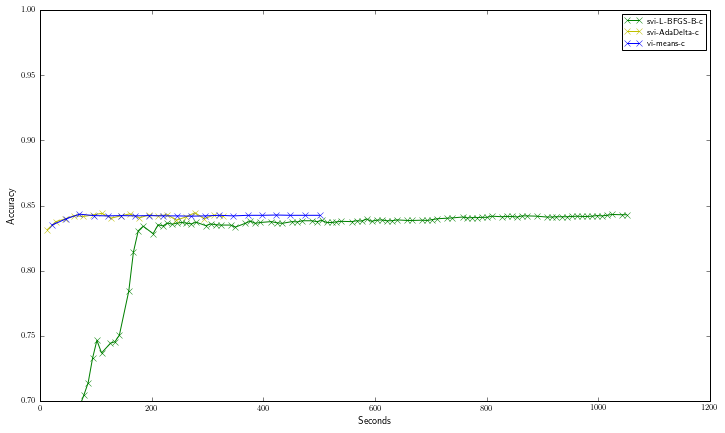

In [34]:
plt.figure(figsize=(12, 7))
plt.plot(svi_x_lst[1:], svi_y_lst[1:], '-gx', label='svi-L-BFGS-B-c')
plt.plot(svi_ad_x_lst[1:], svi_ad_y_lst[1:], '-yx', label='svi-AdaDelta-c')
plt.plot(vi_x_lst[1:], vi_y_lst[1:], '-bx', label='vi-means-c')
plt.ylim([0.7, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

In [17]:
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_x.npy', vi_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_y.npy', vi_y_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_t_x.npy', vi_t_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_t_y.npy', vi_t_y_lst)

In [35]:
np.save('../plots/vi_vs_svi_class/'+ data_name +'_svi_x.npy', svi_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_svi_y.npy', svi_y_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_x.npy', vi_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_y.npy', vi_y_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_ad_x.npy', svi_ad_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_ad_y.npy', svi_ad_y_lst)

In [14]:
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_st_x.npy', vi_st_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_st_y.npy', vi_st_y_lst)